# importing libraries 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


# loading datasets

In [5]:
df = pd.read_csv('dynamic_pricing.csv')
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [7]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


# basic checks and data cleaning and preprocessing 

In [9]:
df.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [11]:
df.Location_Category.value_counts()

Location_Category
Urban       346
Rural       332
Suburban    322
Name: count, dtype: int64

In [13]:
df.Customer_Loyalty_Status.value_counts()

Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: count, dtype: int64

In [15]:
df.Location_Category = df.Location_Category.map({
    "Urban":0,
    "Rural":1,
    "Suburban":2
})

df.Customer_Loyalty_Status = df.Customer_Loyalty_Status.map({
    "Silver":0,
    "Regular":1,
    "Gold":2
})

In [17]:
df.Time_of_Booking.value_counts()

Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      231
Name: count, dtype: int64

In [19]:
df.Vehicle_Type.value_counts()

Vehicle_Type
Premium    522
Economy    478
Name: count, dtype: int64

In [21]:
df.Time_of_Booking = df.Time_of_Booking.map({
    "Night":0,
    "Afternoon":1,
    "Morning":2,
    "Evening":3
})

df.Vehicle_Type = df.Vehicle_Type.map({
    "Premium":0,
    "Economy":1
})

In [23]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,0,0,13,4.47,0,0,90,284.257273
1,58,39,2,0,72,4.06,3,1,43,173.874753
2,42,31,1,0,0,3.99,1,0,76,329.795469
3,89,28,1,1,67,4.31,1,0,134,470.201232
4,78,22,1,1,74,3.77,1,1,149,579.681422


In [25]:
df.isna().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Plotting pairplot to visualize all relationships

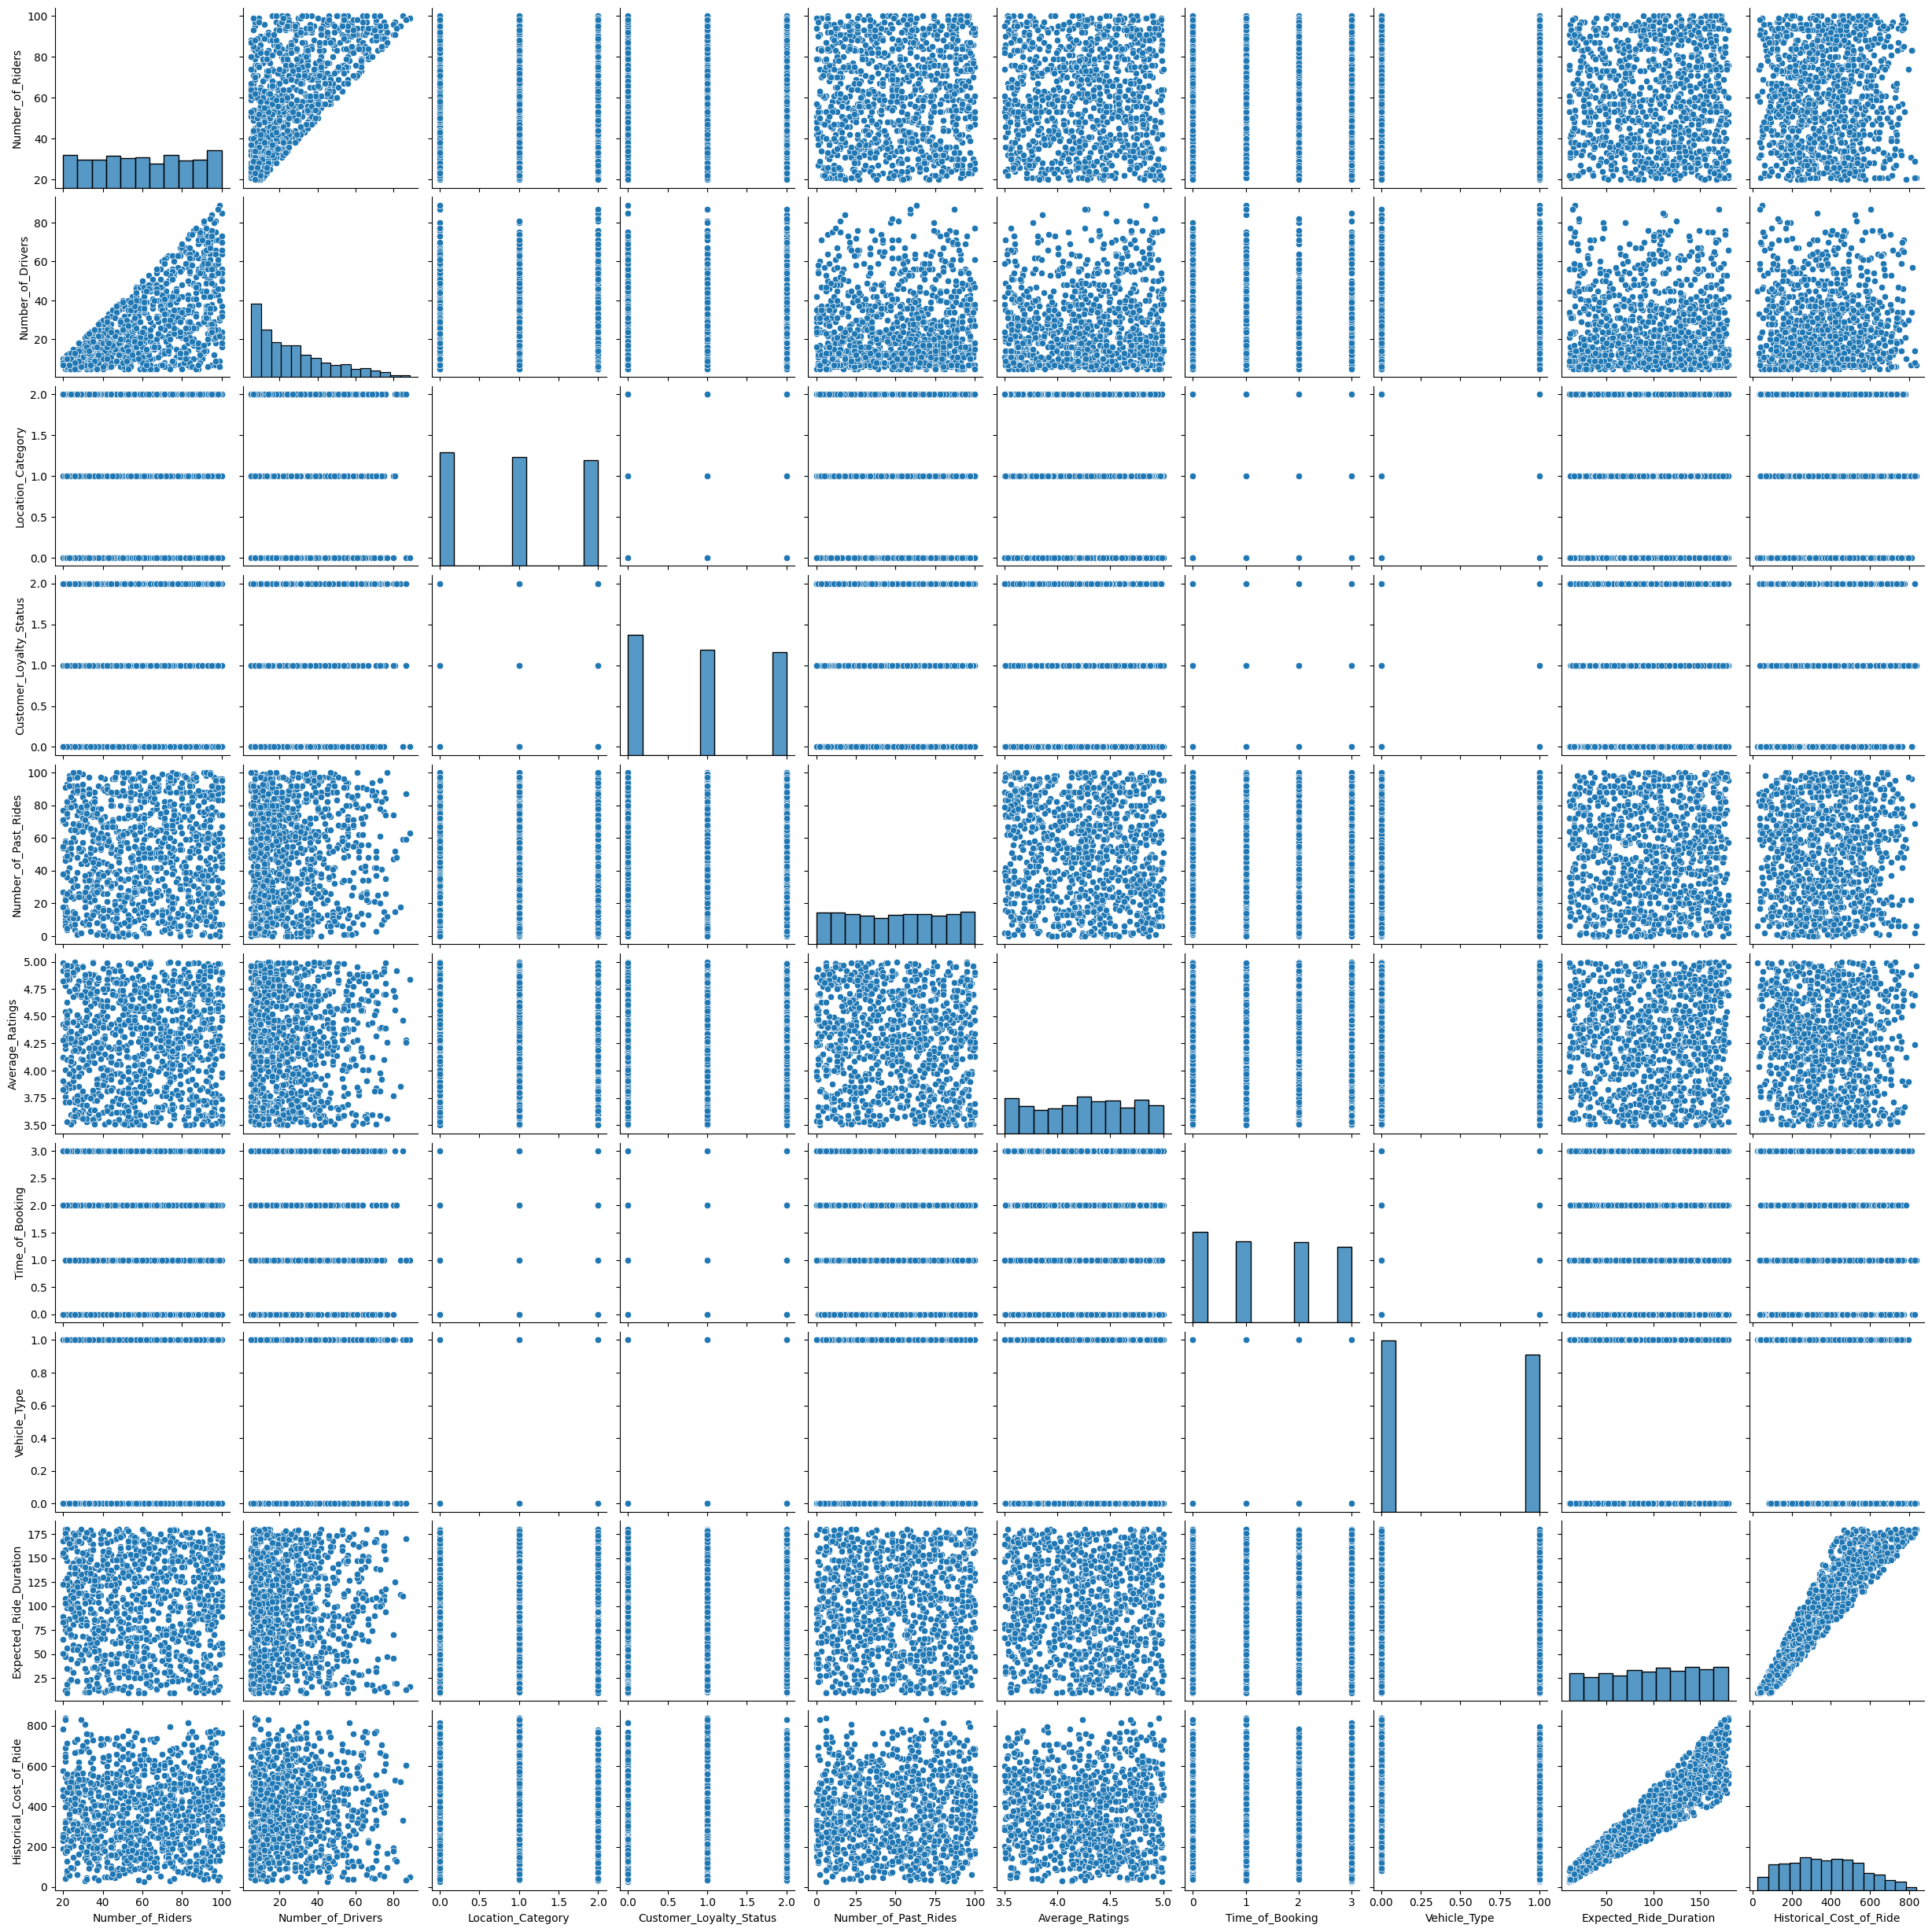

In [32]:
sns.pairplot(df)

# Dividing labels

In [37]:
X = df.drop("Historical_Cost_of_Ride", axis=1)
y = df["Historical_Cost_of_Ride"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

# model building & algorithm

In [49]:
import pickle


Evaluating Model: Linear Regression
Training R² score: 0.8735208038573488
R² score: 0.8852161982612252
Mean Squared Error (MSE): 4290.455122189785
Root Mean Squared Error (RMSE): 65.50156579952714
Mean Absolute Error (MAE): 50.816336432810566


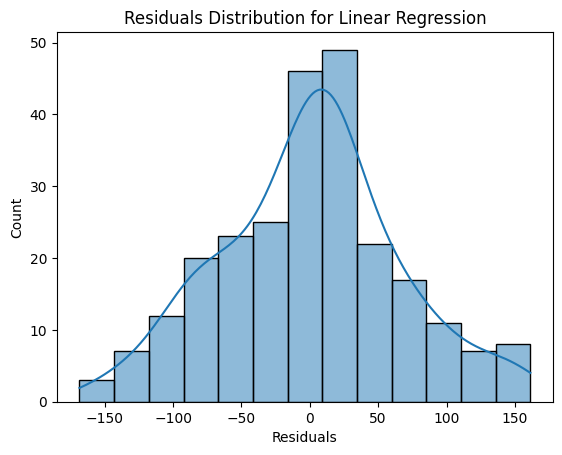


Evaluating Model: Decision Tree Regressor
Training R² score: 1.0
R² score: 0.7458337558811747
Mean Squared Error (MSE): 9500.37241708625
Root Mean Squared Error (RMSE): 97.46985388870884
Mean Absolute Error (MAE): 69.69193480994704


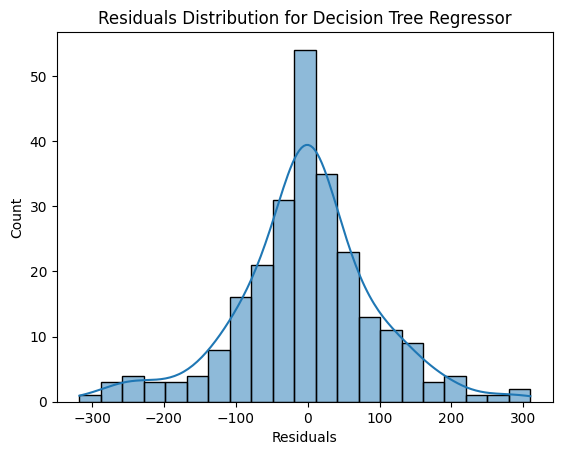


Evaluating Model: Random Forest Regressor
Training R² score: 0.9793120605755194
R² score: 0.8808111433935097
Mean Squared Error (MSE): 4455.10980285395
Root Mean Squared Error (RMSE): 66.74660892400415
Mean Absolute Error (MAE): 50.95377931416684


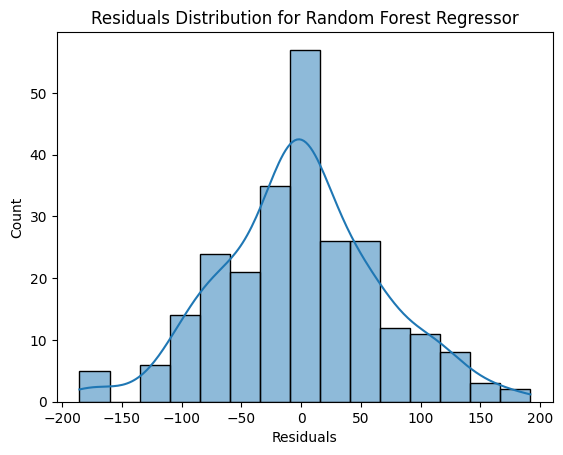


Evaluating Model: Gradient Boosting Regressor
Training R² score: 0.9287623411027588
R² score: 0.8819500674850432
Mean Squared Error (MSE): 4412.5384414921255
Root Mean Squared Error (RMSE): 66.42694063023018
Mean Absolute Error (MAE): 52.40065239581087


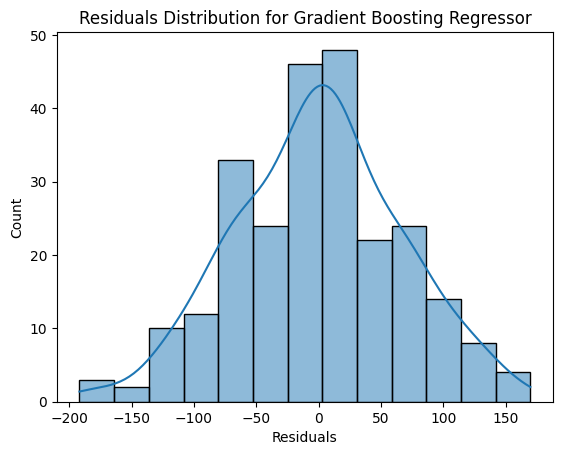


Evaluating Model: K-Neighbors Regressor
Training R² score: 0.891737925384039
R² score: 0.8314327591547986
Mean Squared Error (MSE): 6300.803518981032
Root Mean Squared Error (RMSE): 79.37760086435614
Mean Absolute Error (MAE): 61.63495161401213


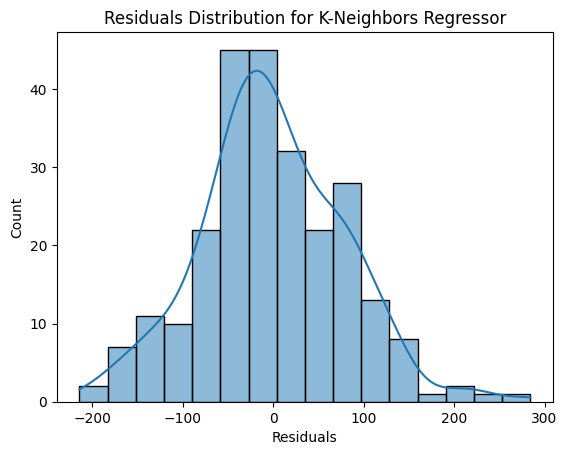


Evaluating Model: XGBoost Regressor
Training R² score: 0.9999064887561039
R² score: 0.8709988606507139
Mean Squared Error (MSE): 4821.878964673598
Root Mean Squared Error (RMSE): 69.43975060924109
Mean Absolute Error (MAE): 53.50276134972621


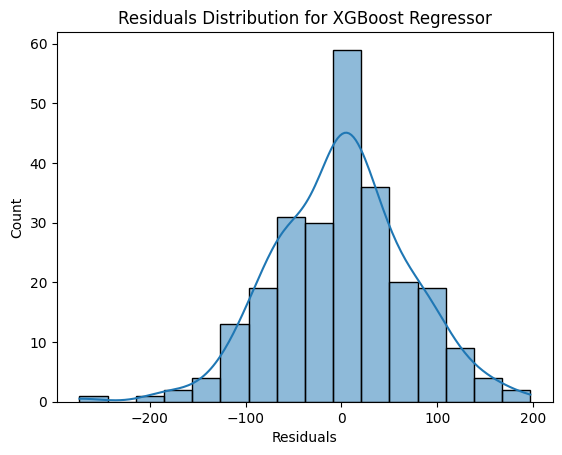


Evaluating Model: SVM Regressor
Training R² score: 0.5947151241614198
R² score: 0.5954297067445753
Mean Squared Error (MSE): 15122.261684047335
Root Mean Squared Error (RMSE): 122.97260542107472
Mean Absolute Error (MAE): 98.57867598664242


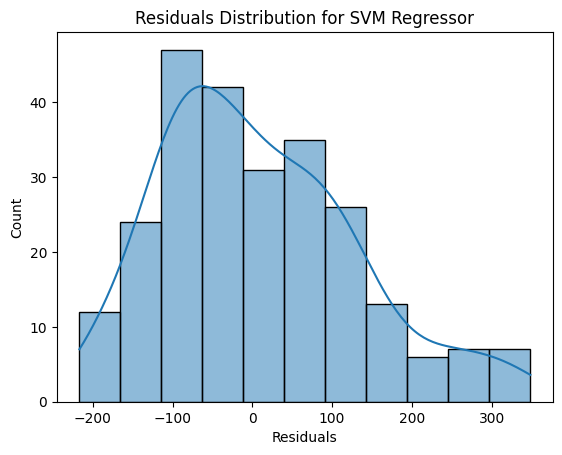

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to train and evaluate the model
def algorithm(ml_model, model_name):
    print(f"\nEvaluating Model: {model_name}")
    model = ml_model.fit(X_train, y_train)
    
    # Training metrics
    training_r2 = model.score(X_train, y_train)
    print(f"Training R² score: {training_r2}")
    
    # Testing metrics
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)  
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print metrics
    print(f"R² score: {r2}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    
    # Plot residuals
    sns.histplot(y_test - y_pred, kde=True)
    plt.title(f"Residuals Distribution for {model_name}")
    plt.xlabel("Residuals")
    plt.show()
    
    return y_pred

# List of models
models = [
    (LinearRegression(), "Linear Regression"),
    (DecisionTreeRegressor(), "Decision Tree Regressor"),
    (RandomForestRegressor(), "Random Forest Regressor"),
    (GradientBoostingRegressor(), "Gradient Boosting Regressor"),
    (KNeighborsRegressor(), "K-Neighbors Regressor"),
    (XGBRegressor(), "XGBoost Regressor"),
    (SVR(), "SVM Regressor")
]

# Apply the function to each model
for model, name in models:
    algorithm(model, name)
